In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# K-Means

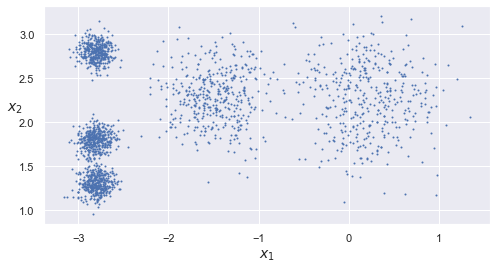

In [2]:
# make 5 clusters; copied from ageron's homl2 notebook
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)

In [3]:
# fit a k-means model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5).fit(X)
y_pred = km.predict(X)
# cluster centers discovered by k-means
km.cluster_centers_

array([[ 0.20667809,  2.25769931],
       [-2.80389616,  1.80117999],
       [-1.47077903,  2.28400646],
       [-2.80037642,  1.30082566],
       [-2.7943747 ,  2.79740645]])

## Figure 9.3: K-Means decision boundaries

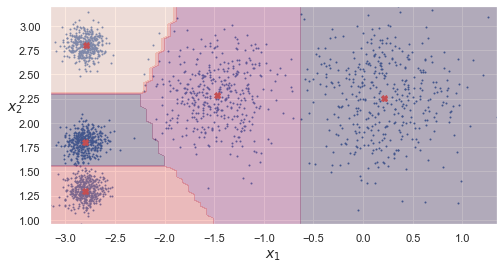

In [4]:
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 75)
x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 75)
XX, YY = np.meshgrid(x1, x2)
X_new = np.c_[XX.ravel(), YY.ravel()]
z = km.predict(X_new).reshape(XX.shape)

fig, ax = plt.subplots(figsize=(8, 4))
plot_clusters(X)
ax.contourf(XX, YY, z, levels=[0, 1, 2, 3, 4], alpha=0.3)
ax.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'X', color='r')

## Dimension reduction
KMeans().transform() method gives an instance's distance to every cluster centroid. This way a high dimensional dataset can be represented as a k-dimension dataset, where k is the number of clusters. 

When k < p, this leads to non-linear dimensionality reduction.

In [5]:
km.transform(X)[:5] # distance of an instance to every cluster centriod

array([[3.04478368, 0.46779778, 1.54515672, 0.11146795, 1.45511541],
       [3.11366606, 0.07122059, 1.48176272, 0.51431557, 0.99090176],
       [1.32315113, 3.81713488, 2.6743981 , 3.76340605, 4.09243822],
       [3.17978857, 0.13643124, 1.5464972 , 0.52058348, 1.0058061 ],
       [2.98720351, 0.14170053, 1.3903834 , 0.39014221, 1.11599013]])

In [6]:
km.predict(X)[:5] # an instance is assigned to closest cluster

array([3, 1, 0, 1, 1])

## Suboptimal solution
KMeans can arrive at a suboptimal solution, it depends on the centroid initialization.

In [7]:
def plot_km_decision_boundary(clusterer, X, ax=None):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 75)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 75)
    XX, YY = np.meshgrid(x1, x2)
    X_new = np.c_[XX.ravel(), YY.ravel()]
    z = km.predict(X_new).reshape(XX.shape)
    n_clusters = clusterer.cluster_centers_.shape[0] # (n_clusters, n_features)
    levels = list(range(n_clusters))
    plt.contourf(XX, YY, z, levels=levels, alpha=0.3)
    plot_clusters(X)

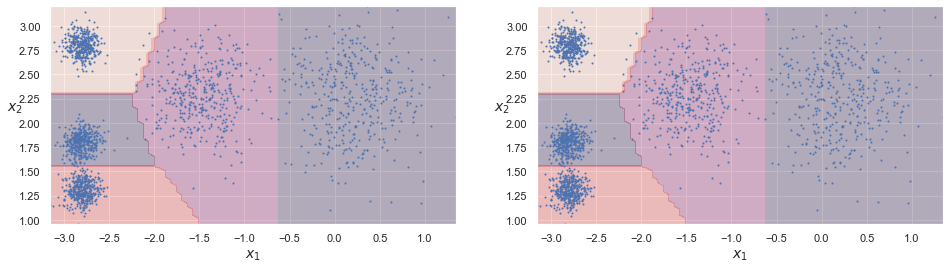

In [8]:
km1 = KMeans(n_clusters=5, init='random', # k-means++ intitializes centroids efficiently
             n_init=1, # by default, kmeans runs 10 times and chooses the best centroid initialization
             random_state=2, algorithm='full')
km2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=5, algorithm='full')

km1.fit(X)
km2.fit(X)

plt.figure(figsize=(16, 4))
plt.subplot(121)
plot_km_decision_boundary(km1, X)
plt.subplot(122)
plot_km_decision_boundary(km2, X)

## Finding the optimal number of clusters
Finding the optimal number of clusters is not an easy task, especially in higher-dimensions where we can't visualize the data. Since this is an unsupervised learning, we can't use cross-validation too. 

Inertia is the mean of squared distance b/w each instance and it's centroid. However, inertia is NOT a good metric for evaluating k-means clustering because higher the number of clusters, closer an instance is to its centroid and smaller the inertia is. In fact, if k=n, inertia is 0.

If the number of clusters is lesser than optimal, instances from different blobs are incorrectly clustered together. If the number of clusters is more than optimal, instances from the same blob are split into different clusters. 

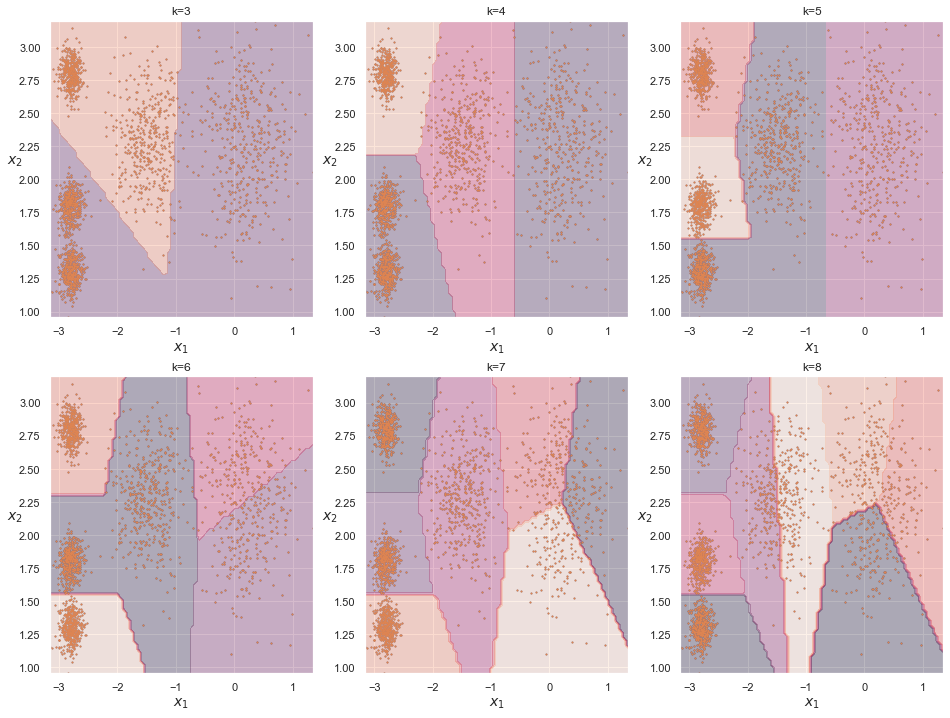

In [9]:
inertias, estimators = [], []

plt.figure(figsize=(16, 12))
column = 1
for k in range(3, 9):
    km = KMeans(n_clusters=k).fit(X)
    estimators.append(km)
    inertias.append(km.inertia_)
    plt.subplot(2, 3, column)
    plot_clusters(X)
    plot_km_decision_boundary(km, X)
    plt.title(f'k={k}')
    column += 1

Text(0.5, 0, 'K')

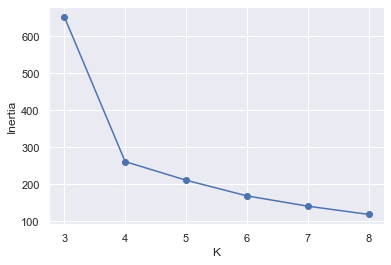

In [10]:
# plot inertias
plt.plot(range(3, 9), inertias, '-o')
plt.ylabel('Inertia')
plt.xlabel('K')

## Silhouette score
Since inertia is not a good metric for decicing the optimal number of clusters, we need other metrics. One such a metric is silhouette score. It's a measure of how close an instance is to it's own cluster vs. other clusters. Possible scores vary from -1 to +1.

- A score of +1 means an instance is well inside it's own cluster. 
- A score of 0 means an instance is at the cluster bounday. 
- A score of -1 means an instance is in the wrong cluster. 

Text(0.5, 0, 'K')

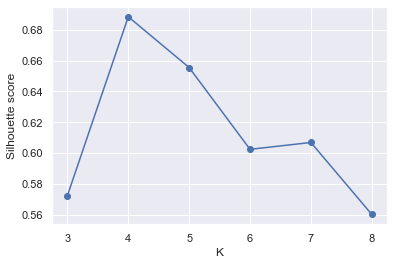

In [11]:
from sklearn.metrics import silhouette_score
scores = [silhouette_score(X, model.labels_) for model in estimators]
# plot silhouette scores
plt.plot(range(3, 9), scores, '-o')
plt.ylabel('Silhouette score')
plt.xlabel('K')

Above, silhouette score is high for 4 or 5. Either could be choses as optimal k.

## Applications of clustering
### Clustering for image segmentation

In [12]:
image = plt.imread('./ladybug.png')
print(image.shape) # hieght, width and number of color channels (=3 i.e. RGB)

(533, 800, 3)


In [13]:
image[:2, :2, :]

array([[[0.09803922, 0.11372549, 0.00784314],
        [0.09411765, 0.10980392, 0.00392157]],

       [[0.09411765, 0.10980392, 0.00392157],
        [0.09019608, 0.10588235, 0.        ]]], dtype=float32)

(-0.5, 799.5, 532.5, -0.5)

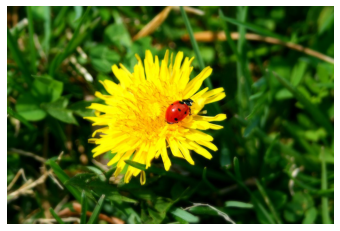

In [14]:
plt.imshow(image)
plt.axis('off')

<AxesSubplot:>

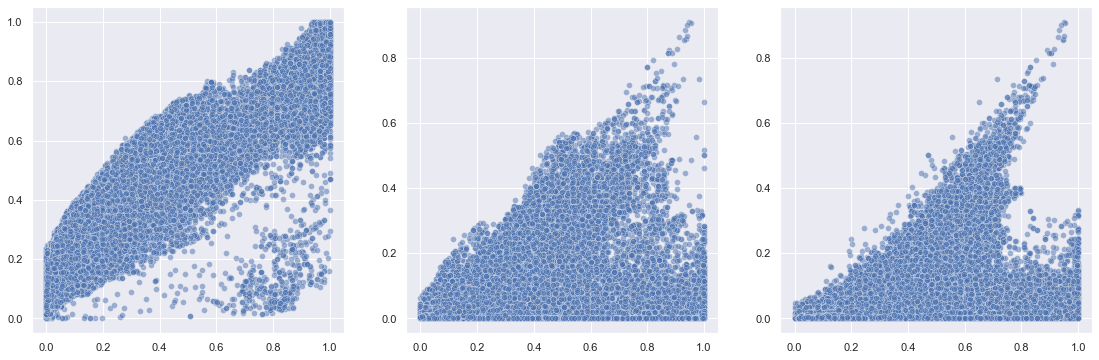

In [15]:
# let's visualize the image and see if there are clusters
X = image.reshape(-1, 3)
fig, ax = plt.subplots(1, 3, figsize=(19, 6))

n_samples = len(X)//5
X_sub = X[np.random.choice(len(X), size=n_samples)]

# Red vs. Green colors
sns.scatterplot(x=X_sub[:, 0], y=X_sub[:, 1], alpha=0.5, ax=ax[0])
# Red vs. Blue colors
sns.scatterplot(x=X_sub[:, 0], y=X_sub[:, 2], alpha=0.5, ax=ax[1])
# Green vs. Blue colors
sns.scatterplot(x=X_sub[:, 1], y=X_sub[:, 2], alpha=0.5, ax=ax[2])

### Image color segmentation

Wall time: 18.3 s
Wall time: 9.98 s
Wall time: 7.96 s
Wall time: 4.37 s
Wall time: 2.32 s


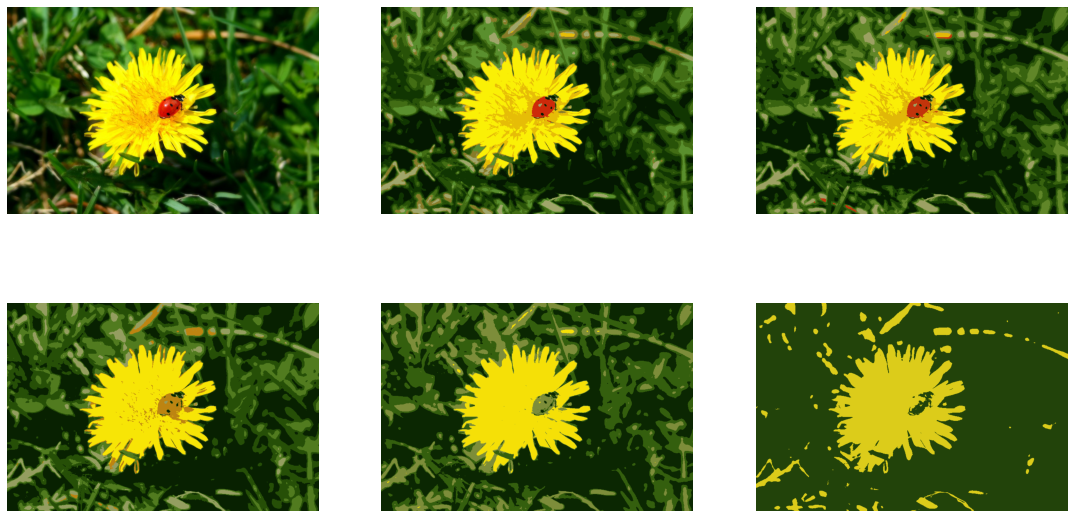

In [16]:
# let's find color clusters and replace a pixel with it's cluster mean
# let's do this for k=range(10, 1, -2) clusters
fig, ax = plt.subplots(2, 3, figsize=(19, 10))
ax = ax.ravel()
ax[0].imshow(image)
ax[0].axis('off')
i = 1
for k in range(10, 1, -2):
    %time km = KMeans(n_clusters=k).fit(X)
    segmented_image = km.cluster_centers_[km.labels_]
    ax[i].imshow(segmented_image.reshape(image.shape))
    ax[i].axis('off')
    i += 1

### Clustering for preprocessing
Preprocess the data by replacing each instance with it's distance to each of the k clusters. If k < p, then this is non-linear dimensionality reduction. This preprocessing data is then passed on to a training algorithm. This helps in reducing the training time and test accuracy.

In [17]:
# load the digits dataset
from sklearn.datasets import load_digits
digits_data, digits_target = load_digits(return_X_y=True)
digits_data.shape, digits_target.shape

((1797, 64), (1797,))

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(digits_data, digits_target, random_state=42, test_size=0.2)

In [19]:
# let's perform logistic regression on the original data
from sklearn.linear_model import LogisticRegression
%time lr1 = LogisticRegression().fit(xtrain, ytrain)
orig_score = lr1.score(xtest, ytest)
orig_score

Wall time: 163 ms


C:\Users\jvenepal\Anaconda3\envs\cs109a\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9694444444444444

In [20]:
# now, let's preprocess the data with kmeans clustering before log_reg
from sklearn.pipeline import Pipeline
k = 50
pipe = Pipeline([
    ('kmeans', KMeans(n_clusters=k)),
    ('log_reg', LogisticRegression())
])
%time pipe.fit(xtrain, ytrain)
preprocess_score = pipe.score(xtest, ytest)

preprocess_score

Wall time: 748 ms


C:\Users\jvenepal\Anaconda3\envs\cs109a\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9638888888888889

In [21]:
# do grid search for finding the optimal no. of clusters
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

parameters = {'kmeans__n_clusters': range(20, 150, 2)}
grid_clf = GridSearchCV(pipe, parameters, cv=3)
%time grid_clf.fit(xtrain, ytrain)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(xtest, ytest)

In [ ]:
grid_clf.best_estimator_.score(xtest, ytest)

### Clustering for semi-supervised learning

In [ ]:
# let's train a logistic regression model in just 50 random instances
n_samples = 50
xtrain_sub, ytrain_sub = xtrain[:n_samples], ytrain[:n_samples]
%time lr_sub = LogisticRegression().fit(xtrain_sub, ytrain_sub)
lr_sub.score(xtest, ytest)

In [ ]:
np.unique(ytrain_sub, return_counts=True)

In [ ]:
# instead of training on 50 random instances, let's train on more representative instances
# representative instances are instances that are better representatives of a class
# we find representative instances by finding instances closest to the cluster centroid
%time km2 = KMeans(n_clusters=n_samples).fit(xtrain, ytrain)
xtrain_dist = km2.transform(xtrain)
# closest instance id
closest_idx = np.argmin(xtrain_dist, axis=0)
closest_ins = xtrain[closest_idx]

In [ ]:
# let's plot the representative instances
fig, ax = plt.subplots(5, 10, figsize=(8, 2))
ax = ax.ravel()
for i in range(n_samples):
    data = closest_ins[i].reshape(8, 8)
    ax[i].imshow(data, cmap='binary', interpolation='nearest')
    ax[i].axis('off')

In [ ]:
# representative instance targets
closest_targets = ytrain[closest_idx]
closest_targets.reshape(5, 10)

In [ ]:
np.unique(closest_targets, return_counts=True)

In [ ]:
# let's train a logit model on the representative instances and see if perf. improves
lr_rep = LogisticRegression().fit(closest_ins, closest_targets)
lr_rep.score(xtrain, ytrain)

In [ ]:
(0.9171885873347251 - 0.8277777777777777) / 0.8277777777777777

As we can see above, perf. improves by 11% even through we are still training on only 50 instances. This is because we are now traning on 'more representative' instances instead of random instances.

### Label propagation
Above, we train on only 50 instances. What if we propagate the labels to all/some of the instances in the cluster and train on this increased number of instances. Will this lead to an increase in performance?

In [ ]:
percentile = 20 # propagate lables to 20% of cluster instances
prop_data = np.empty((0, 64), dtype='float64')
prop_target = np.empty(0)
# for i in range(50):
inst_dist_to_ith_cluster = xtrain_dist[:, 0]
cutoff_dist = np.percentile(inst_dist_to_ith_cluster, percentile)
in_cluster = (inst_dist_to_ith_cluster < cutoff_dist)
closest_idx = np.argmin(xtrain_dist[:, 0])
closest_ins_target = ytrain[closest_idx]
np.append(prop_data, xtrain[in_cluster], axis=0)
np.append(prop_target, np.full(len(xtrain[in_cluster]), closest_ins_target))

In [ ]:
prop_target.shape

In [ ]:
np.append(np.empty((0, 64), dtype='float64'), xtrain[in_cluster], axis=0).shape

In [ ]:
xtrain[in_cluster].dtype